# Retail Store Data- Exploratory Data Analysis
***
### _Sayali Bachhav_

##### Problem Statement:
As a business manager, finding out weak areas where you can work to make more profit

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import gc

In [2]:
#Importing Data
store = pd.read_csv('SampleSuperstore.csv')
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [3]:
# Checking for data columns and dtypes and if any null values
store.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [4]:
store=store.round(2)
store.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category   Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.96         2   
1        42420  South        Furniture       Chairs  731.94         3   
2        90036   West  Office Supplies       Labels   14.62         2   
3        33311  South        Furniture       Tables  957.58         5   
4        33311  South  Office Supplies      Storage   22.37         2   

   Discount  Profit  
0      0.00   41.91  
1      0.00  219.58  
2      0.00    6.87  
3      0.45 -383.03  
4      0.20    2.52

In [5]:
store.isnull().values.any()

False

In [6]:
# Checking for number of unique values for all columns
store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5456
Quantity          14
Discount          12
Profit          5155
dtype: int64

## 1. Data Cleaning and Pre-processing

In [7]:
#Dropping unnecessary column - Country
store.drop(['Country','Postal Code'],axis=1,inplace=True)

# Checking for duplicate rows
print(store.duplicated().sum())
store.drop_duplicates(inplace=True, ignore_index=True)

store.info()

50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   City          9944 non-null   object 
 3   State         9944 non-null   object 
 4   Region        9944 non-null   object 
 5   Category      9944 non-null   object 
 6   Sub-Category  9944 non-null   object 
 7   Sales         9944 non-null   float64
 8   Quantity      9944 non-null   int64  
 9   Discount      9944 non-null   float64
 10  Profit        9944 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 854.7+ KB


In [8]:
# Adding state codes to data for future rendering of map
state_codes = {
    'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}

store['state_code'] = store['State'].apply(lambda x : state_codes[x])
store.head()
#store.info()

Ship Mode    Segment             City       State Region  \
0    Second Class   Consumer        Henderson    Kentucky  South   
1    Second Class   Consumer        Henderson    Kentucky  South   
2    Second Class  Corporate      Los Angeles  California   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida  South   

          Category Sub-Category   Sales  Quantity  Discount  Profit state_code  
0        Furniture    Bookcases  261.96         2      0.00   41.91         KY  
1        Furniture       Chairs  731.94         3      0.00  219.58         KY  
2  Office Supplies       Labels   14.62         2      0.00    6.87         CA  
3        Furniture       Tables  957.58         5      0.45 -383.03         FL  
4  Office Supplies      Storage   22.37         2      0.20    2.52         FL

In [9]:
# # Adding latitude and longitude data from address

# addresses = store[['City','State']].agg(', '.join, axis=1)
# addresses=addresses.drop_duplicates().reset_index(drop=True)
# locations = pd.DataFrame({'Address':addresses})
# locations['Address']=locations['Address']+', USA'
# locations.head()

In [10]:
# locations.shape

In [11]:
# # Getting coordinates from Nominatim
# from geopy.geocoders import Nominatim    
# from geopy.extra.rate_limiter import RateLimiter


# geolocator = Nominatim(user_agent='myGeocoder',timeout=None)
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# locations['location'] = locations['Address'].apply(geocode)
# locations['Coordinates'] = locations['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# locations.drop('location',axis=1,inplace=True)
# locations.info()

In [12]:
# locations=locations.join(pd.DataFrame(locations['Address'].str.split(', ').tolist(),
#                     columns = ['City','State', 'Country']))
# locations.drop(['Address','Country'], axis=1, inplace=True)

# # Coordinates to separate columns of lat, long
# locations[['Latitude', 'Longitude','extra']] = pd.DataFrame(locations['Coordinates'].tolist(), index=locations.index)
# locations.drop(['Coordinates','extra'], axis=1, inplace=True)

# # Dropping rows with any null value
# locations.dropna(how='any', inplace=True)
# locations.reset_index(drop=True,inplace=True)
# locations.head()

In [13]:
# df = store.merge(locations, on=['City','State'])
# df.head()

In [14]:
def categorize(row):
    if row['Profit']<0:
        return 'Loss'
    elif row['Profit']>=0:
        return 'Profit'
store['Prof_Cat']=store.apply(lambda row: categorize(row), axis=1)
store.head()

Ship Mode    Segment             City       State Region  \
0    Second Class   Consumer        Henderson    Kentucky  South   
1    Second Class   Consumer        Henderson    Kentucky  South   
2    Second Class  Corporate      Los Angeles  California   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida  South   

          Category Sub-Category   Sales  Quantity  Discount  Profit  \
0        Furniture    Bookcases  261.96         2      0.00   41.91   
1        Furniture       Chairs  731.94         3      0.00  219.58   
2  Office Supplies       Labels   14.62         2      0.00    6.87   
3        Furniture       Tables  957.58         5      0.45 -383.03   
4  Office Supplies      Storage   22.37         2      0.20    2.52   

  state_code Prof_Cat  
0         KY   Profit  
1         KY   Profit  
2         CA   Profit  
3         FL     Loss  
4         FL   Profit

In [15]:
store.to_csv('cleaned_df.csv', index=False)

In [16]:
del store, #addresses, locations
gc.collect()

176

In [17]:
df=pd.read_csv('cleaned_df.csv')
df.head()

Ship Mode    Segment             City       State Region  \
0    Second Class   Consumer        Henderson    Kentucky  South   
1    Second Class   Consumer        Henderson    Kentucky  South   
2    Second Class  Corporate      Los Angeles  California   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida  South   

          Category Sub-Category   Sales  Quantity  Discount  Profit  \
0        Furniture    Bookcases  261.96         2      0.00   41.91   
1        Furniture       Chairs  731.94         3      0.00  219.58   
2  Office Supplies       Labels   14.62         2      0.00    6.87   
3        Furniture       Tables  957.58         5      0.45 -383.03   
4  Office Supplies      Storage   22.37         2      0.20    2.52   

  state_code Prof_Cat  
0         KY   Profit  
1         KY   Profit  
2         CA   Profit  
3         FL     Loss  
4         FL   Profit

## 2. Getting Summary of numerical and categorical variables

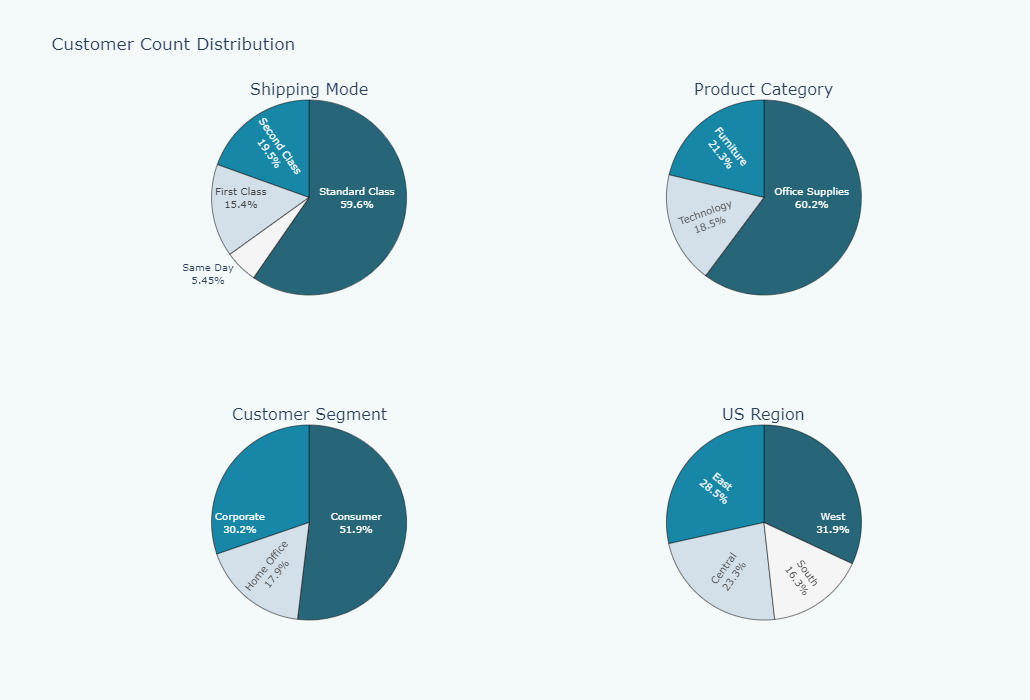

In [18]:
# Plotting pie charts for categorical data to see customer counts distibution

# Create subplots
fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=("Shipping Mode", "Product Category", "Customer Segment", "US Region"))

labels1 = df['Ship Mode'].value_counts().index
values1 = df['Ship Mode'].value_counts().values
fig.add_trace(go.Pie(labels=labels1, values=values1, name="Shipping Mode"),
             1, 1)

labels2 = df['Category'].value_counts().index
values2 = df['Category'].value_counts().values
fig.add_trace(go.Pie(labels=labels2, values=values2, name="Product Category"),
              1, 2)

labels3 = df['Segment'].value_counts().index
values3 = df['Segment'].value_counts().values
fig.add_trace(go.Pie(labels=labels3, values=values3, name="Customer Segment"),
              2, 1)

labels4 = df['Region'].value_counts().index
values4 = df['Region'].value_counts().values
fig.add_trace(go.Pie(labels=labels4, values=values4, name="Region"),
              2, 2)

fig.update_traces(textinfo = "label+percent",textfont_size=10,insidetextorientation='radial',
                  hoverinfo="label+percent",
                  marker=dict(colors=['276678', '1687a7', 'd3e0ea','f6f5f5'], 
                              line=dict(color='#000000', width=0.5))
                 )

fig.update_layout(height=700, width=700, 
                  autosize = False,
                  title_text='Customer Count Distribution',
                  showlegend=False, paper_bgcolor='#f4f9f9'
                 )
fig.show()

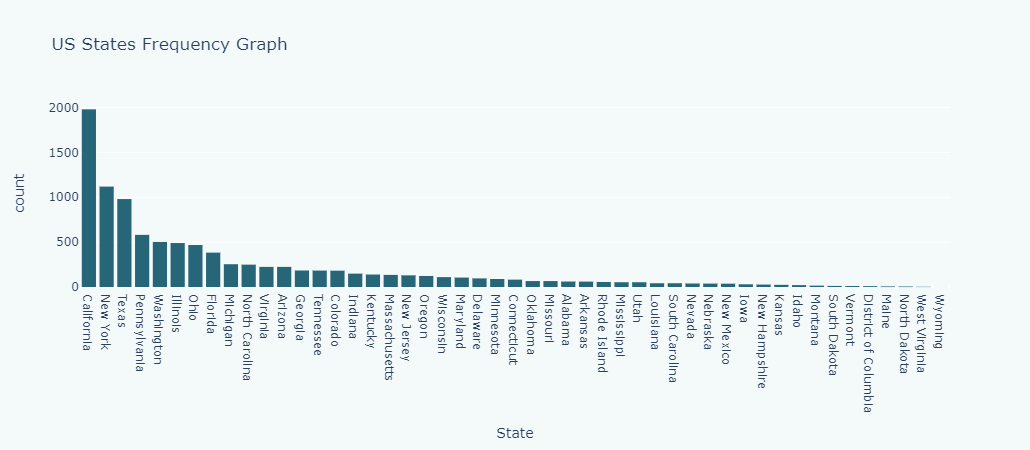

In [19]:
px.histogram(df, x='State',title='US States Frequency Graph'
            ).update_xaxes(categoryorder='total descending'
                          ).update_traces(marker={'color':'#276678'}).update_layout(paper_bgcolor='#f4f9f9', plot_bgcolor='rgba(0,0,0,0)')

In [20]:
# Getting statistical summary on numerical data
df[['Sales','Profit','Discount','Quantity']].describe()

Sales       Profit     Discount     Quantity
count   9944.000000  9944.000000  9944.000000  9944.000000
mean     230.752129    28.770828     0.156440     3.794047
std      624.644769   234.841411     0.206584     2.228752
min        0.440000 -6599.980000     0.000000     1.000000
25%       17.340000     1.720000     0.000000     2.000000
50%       55.000000     8.680000     0.200000     3.000000
75%      210.105000    29.537500     0.200000     5.000000
max    22638.480000  8399.980000     0.800000    14.000000

In [21]:
df[['Sales','Profit','Quantity']].sum()

Sales       2294599.17
Profit       286097.11
Quantity      37728.00
dtype: float64

***
### <font color=blue>__A. Initial Observation__</font>:
***
#### Categorical Data Analysis
1. _Shipping Mode_: Most preferred choice of shipping mode is standard class while very few have opted for same day delivery.
2. _Customer Segment_: Majority of customers are individual consumers.
3. _Product Categories_: The data provides info on sales for three main categories of products of which office supplies have been sold most, next comes furniture and then technology products.
4. _Location_: The customers belong to four regins of US of which west contributes most and south region contributes the least.<br>
Among US states, majority of customers belong to California, New York, Texas while the store has least customer base in Wyoming, West Virginia, North Dakota etc.
***
#### Numerical Data Analysis
1. The data is about <u>9977 customers'transactions</u> of which the time frame for data collection is not provided.
2. The store has sold <u>total</u> of _37,820 units_ of products for _total sales of USD 2,296,195.6_ and _profit of USD 286,241.42_.
3. On an average a customer has purchased <u>3.79 units</u> ranging from minimum of 1 unit to maximum of 14 units.
4. The store has made an _average sales_ of <u>USD 230.14 per customer</u> with minimum sales of USD 0.44 and maximum sales of USD 22,638.48.
5. The store has made _maximum profit_ of USD 8,400 and experienced _maximum loss_ of USD 6,600 to a customer with _average profit_ of <u>USD 28.69 per customer</u>.
6. Average of <u>15% discount</u> with maximum 80% discount.
***

### <u>Retail Analytic Metric:<u/>
**Gross Profit Margin:**
The gross margin is a financial ratio metric, which helps assess the profitability of a business and also its operational efficiency.

It is the relationship between gross profit and sales, and is expressed in percentage:

>(GrossProfit÷Sales)x100

In [22]:
# Calculating Gross Profit Margin
df['Gross PM']=np.multiply(np.divide(df['Profit'],df['Sales']),100)

## 3. Geographical Analysis:

### A. Region

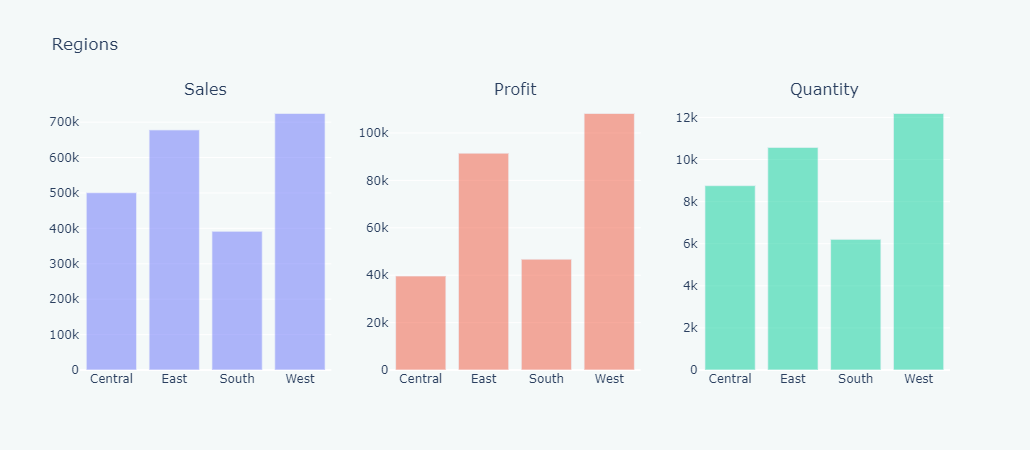

In [23]:
# Plotting region wise sales and profit distribution
region = df.groupby(by='Region',as_index=False).agg({'Sales':'sum',
                                                     'Profit':'sum',
                                                     'Quantity':'sum'
                                                    })
fig = make_subplots(rows=1, cols=3, subplot_titles=("Sales", "Profit", "Quantity"))
fig.add_trace(go.Bar(x=region['Region'], y=region['Sales'], name='Sales'),
             1, 1)
fig.add_trace(go.Bar(x=region['Region'], y=region['Profit'], name='Profit'),
             1, 2)
fig.add_trace(go.Bar(x=region['Region'], y=region['Quantity'], name='Quantity'),
             1, 3)
fig.update_traces(opacity=0.5)
fig.update_layout(title='Regions',    
                  xaxis={'categoryorder':'category ascending'},
                  showlegend=False,
                  paper_bgcolor='#f4f9f9',plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [24]:
del region 
gc.collect()

580

### B. States

In [25]:
# Preparing dataset grouped by states

states=df.groupby(['State','state_code','Region'], as_index=False).agg({'Sales':'sum', 
                                                                        'Profit':'sum', 
                                                                        'Discount':['mean','min','max'],
                                                                        'Quantity':'sum'})
# Calculating Relative Profit
states['Gross PM']=np.multiply(np.divide(states['Profit'],states['Sales']),100)

states.columns = ['_'.join(col) if 'Discount' in col else col[0] for col in states.columns ]
states = states.sort_values('Sales',ascending=False,ignore_index=True)

In [26]:
x = states['State']
y1 = states['Sales']
y2 = states["Sales"].cumsum()/states["Sales"].sum()*100

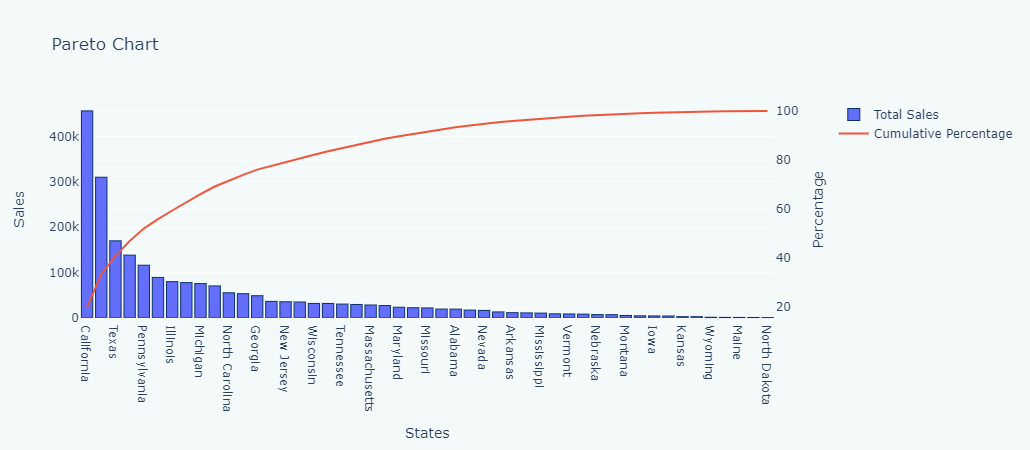

In [27]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=x, y=y1, name="Total Sales"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=x, y=y2, name="Cumulative Percentage"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Pareto Chart",
    paper_bgcolor='#f4f9f9', plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1)

# Set x-axis title
fig.update_xaxes(title_text="States")

# Set y-axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Percentage", secondary_y=True)
fig.show()

Now, lets look at the profit across all states:

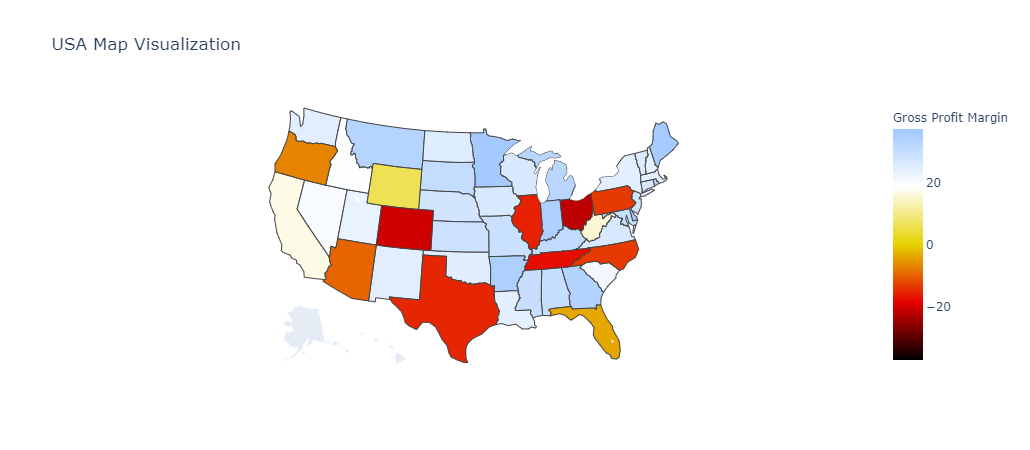

In [28]:
states = states.sort_values('Profit',ascending=False)
states['Sales']=round(states['Sales'])
fig_2=px.choropleth(data_frame=states,
                    locationmode ='USA-states',
                    locations='state_code',
                    scope='usa',
                    color='Gross PM',color_continuous_scale='blackbody',color_continuous_midpoint=0,
                    hover_name='State',
                    hover_data={'State':False,'Sales':True,'Discount_mean':True,'state_code':False, 'Region':True},
                    labels={'Gross PM':'Gross Profit Margin','Discount_mean':'Avg. Discount'},
#                     template='plotly_dark'
                    title='USA Map Visualization'
                   )
fig_2.show()

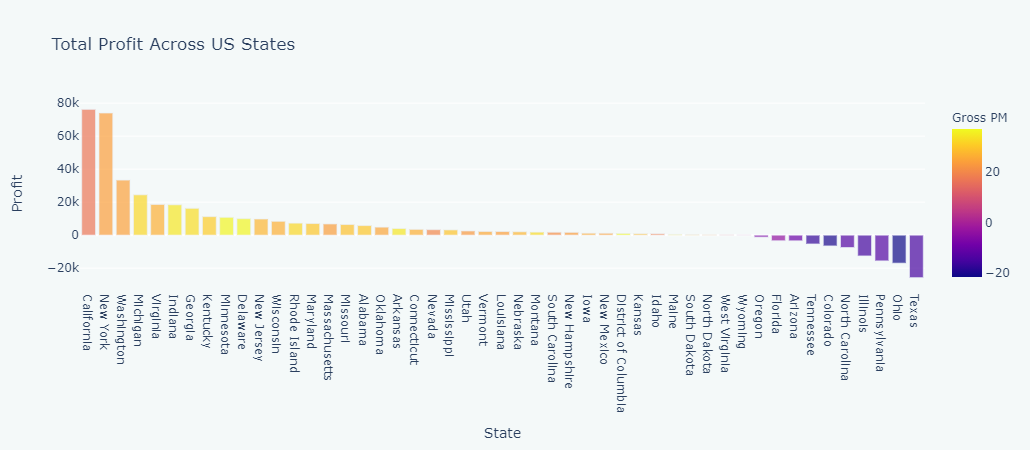

In [29]:
px.bar(data_frame=states, x = 'State', y = 'Profit', color='Gross PM',opacity = 0.7, 
           title = "Total Profit Across US States").update_layout(paper_bgcolor='#f4f9f9', plot_bgcolor='rgba(0,0,0,0)')

In [30]:
print('States (top 10) with highest profit:')
print(*list(states['State'][:10]),sep = ", ")
print('States incurring loss:')
print(*list(states[states['Profit']<0]['State']),sep = ", ")

States (top 10) with highest profit:
California, New York, Washington, Michigan, Virginia, Indiana, Georgia, Kentucky, Minnesota, Delaware
States incurring loss:
Oregon, Florida, Arizona, Tennessee, Colorado, North Carolina, Illinois, Pennsylvania, Ohio, Texas


### C. Cities

In [33]:
cities = df.groupby(by=['State','City'], as_index=False).agg({'Discount':"mean",'Sales':'sum',
                                                              'Profit':'sum','Quantity':'sum'})
cities['Gross PM']=round(np.multiply(np.divide(cities['Profit'],cities['Sales']),100))

In [34]:
print('Cities with Profit in total:\t'+str(len(cities[cities['Profit']>=0]['City'].unique())))
print('Cities with Loss in total:\t'+str(len(cities[cities['Profit']<0]['City'].unique())))

Cities with Profit in total:	427
Cities with Loss in total:	134


In [35]:
cities=cities.sort_values('Gross PM', ascending=False, ignore_index=True)

#### Top 10 cities with highest gross profit margin

In [36]:
cities['City'][:10]

0    Atlantic City
1     Grand Island
2    New Brunswick
3        Royal Oak
4          Holland
5            Davis
6          Antioch
7          Bozeman
8      Summerville
9      Lindenhurst
Name: City, dtype: object

#### Top 10 cities with lowest gross profit margin (incurring highest loss)

In [37]:
cities['City'][-10:]

594        Champaign
595            Tyler
596        Littleton
597        Deer Park
598    Missouri City
599         Danville
600       Romeoville
601           Oswego
602         Mesquite
603          Abilene
Name: City, dtype: object

***
### <font color=blue>__C. Location Insights__</font>:
***

1. The majority (80%) of sales for the store is observed in states of California, New York, Texas, Washington , Pennsylvania and so on.
2. States like Texas, Pennsylvania, Florida, Ohio have experienced loss despite the higher sales.
3. Gross profit margin is lowest in central region.
4. Following Pareto principal it will be advisable to look into profits of top 20% selling states which constitute 80% of total sales.

## 4. Product Category Analysis

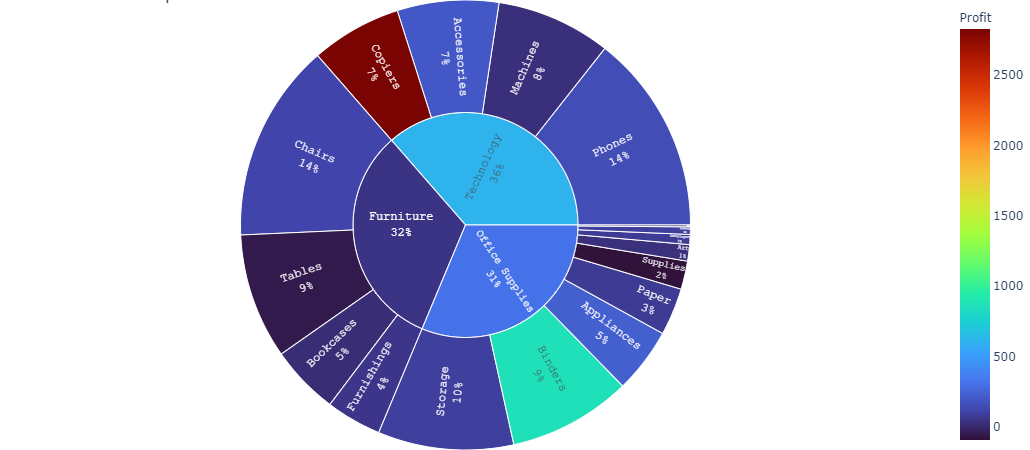

In [38]:
fig = px.sunburst(data_frame=df,
                  path = ['Category','Sub-Category'],
                  values='Sales',
                  color='Profit',
                  color_continuous_scale='turbo',
#                   color_continuous_midpoint=0,
                  hover_name='Category',
                  hover_data={'Category':False},
                 )
fig.update_traces(textfont={'family':'Courier New'},
                  textinfo='label+percent entry',
                  insidetextorientation='radial')
fig.update_layout(title='Sunburst Graph',
                  margin=dict(t=0, l=0, r=0, b=0)
                 )

fig.show()

C:\Users\SAYALI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



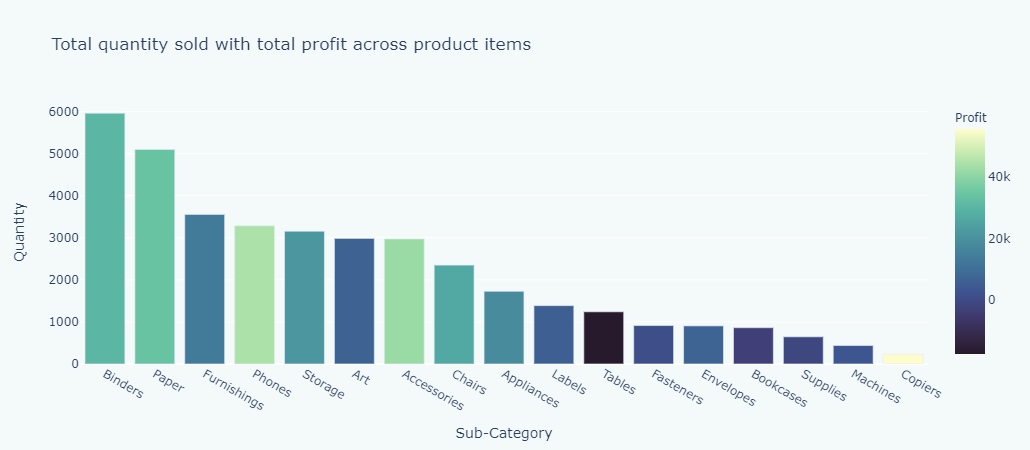

In [39]:
cat = df.groupby(by='Sub-Category',as_index=False)['Quantity','Sales','Profit'].sum().sort_values('Quantity',ascending=False)

px.bar(cat,x='Sub-Category',y='Quantity',
       title='Total quantity sold with total profit across product items',
       color='Profit', color_continuous_scale='deep_r' 
      ).update_layout(paper_bgcolor='#f4f9f9', plot_bgcolor='rgba(0,0,0,0)')

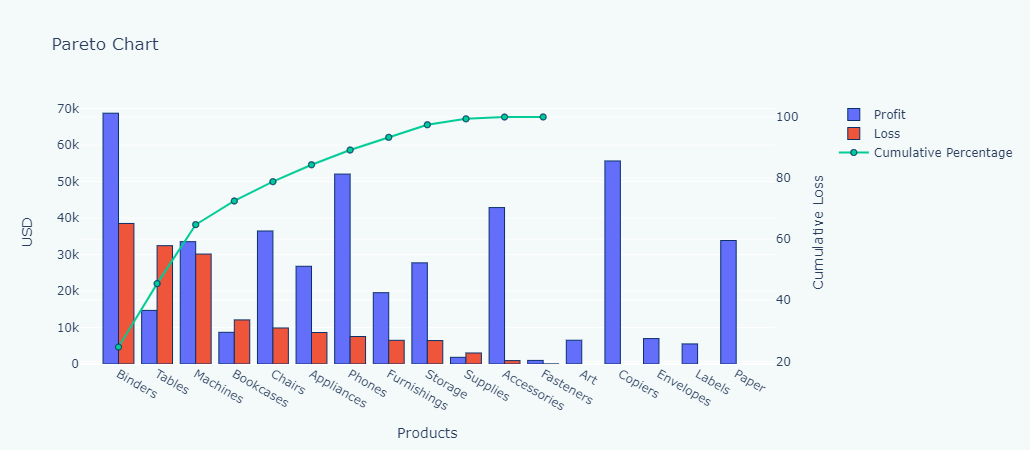

In [40]:
cat = pd.crosstab(index=df['Sub-Category'], columns=df['Prof_Cat'], values=df['Profit'], aggfunc=np.sum)
# cat['Total']=cat['Loss'].add(cat['Profit'], fill_value=0)
cat.reset_index(level=0, inplace=True)
cat.sort_values('Loss',ascending=True, ignore_index=True,inplace=True)
x = cat['Sub-Category']
y1b1 = cat['Profit']
y1b2 = -cat['Loss']
y2 = (-cat["Loss"]).cumsum()/(-cat["Loss"]).sum()*100

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=x, y=y1b1, name="Profit"),# marker_color='indianred',
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=x, y=y1b2, name="Loss"),# marker_color='indianred',
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=x, y=y2, name="Cumulative Percentage"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Pareto Chart", barmode='group',
    paper_bgcolor='#f4f9f9', plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1)

# Set x-axis title
fig.update_xaxes(title_text="Products")


# Set y-axes titles
fig.update_yaxes(title_text="USD", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Loss", secondary_y=True)
fig.show()

***
### <font color=blue>__D. Product Category Insights__</font>
***
1. Technology product sales and profit are highest while furniture has made lowest profit. 
2. The majority of sales come from phones (technology), chairs (furniture), and storage products (office supplies) followed by tables, binders and machines.
3. The highest demand is seen for binders, paper, furnishings, phones, storage and so on.
4. Tables, bookcases and supplies have incurred loss in total. 
5. Majority of loss comes from 'Binders','Tables','Machines','Bookcases', and 'Chairs' and deep analysis into discount is required.
***

## 3. Overall Sales and Profit Distribution:

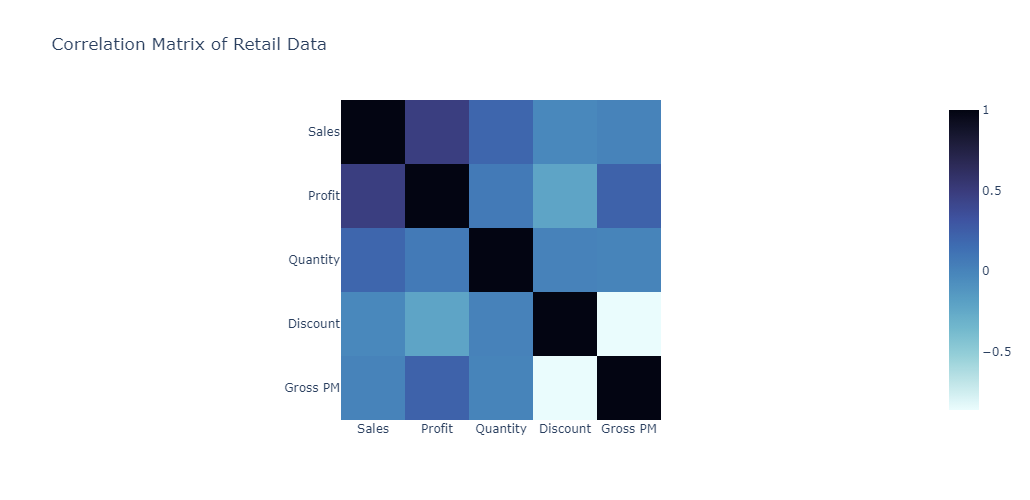

In [41]:
# Analysing correlation matrix for retail variables
px.imshow(df[['Sales','Profit','Quantity','Discount','Gross PM']].corr(), 
          title='Correlation Matrix of Retail Data',
          color_continuous_scale='ice_r').update_layout(height=500,width=500)

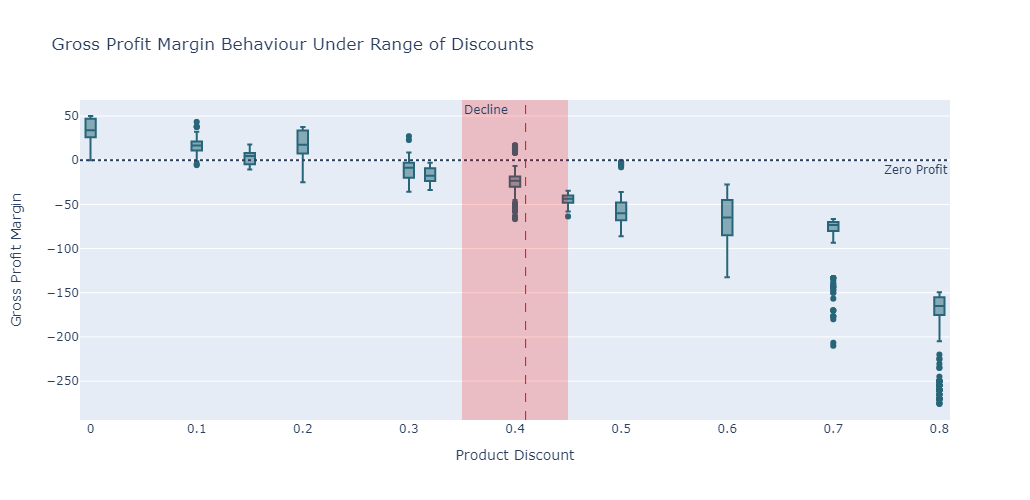

In [42]:
fig_1 = px.box(df, x='Discount', y='Gross PM',
       title='Gross Profit Margin Behaviour Under Range of Discounts',
       labels={'Discount':'Product Discount','Gross PM':'Gross Profit Margin'}
       ).update_traces(marker={'color':'#276678'} 
                      ).update_layout(height=500, width=900)
fig_1.add_hline(y=0, line_dash="dot",
              annotation_text="Zero Profit", 
              annotation_position="bottom right")
fig_1.add_vrect(x0=0.35, x1=0.45, 
              annotation_text="Decline", annotation_position="top left",
              fillcolor='red', opacity=0.20, line_width=0)
fig_1.add_vline(x=0.41, line_width=1, line_dash="dash", line_color="red")
fig_1.show()

In [43]:
top = ['Binders','Tables','Machines','Bookcases','Chairs']

Plotting average quantity sold of each product sub-category per each discount level:  
Standard error of means is calculated for each sample by using formula :   
>=sample standard deviation / root of sample size

In [44]:
p = df.groupby(by=['Discount','Sub-Category'],as_index=False).agg({'Quantity':['mean','std','count']})
p.columns = ['_'.join(col) if 'Quantity' in col else col[0] for col in p.columns ]
p = p[p['Sub-Category'].isin(top)]
p['se']=p['Quantity_std']/np.sqrt(p['Quantity_count'])

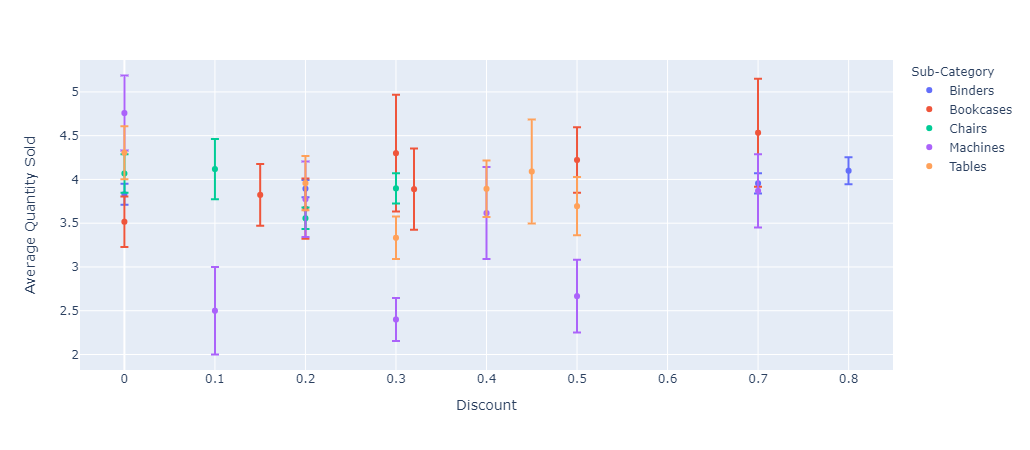

In [45]:
fig=px.scatter(p,x='Discount', y='Quantity_mean', color='Sub-Category', error_y="se")
fig.update_yaxes(title='Average Quantity Sold')
fig.update_layout(barmode='group')
fig.show()

***
### <font color=blue>__B. Overall profit insights__</font>:
***
1. There is a strong negative correlation between gross profit margin and discount on products.
2. Transactions with more than 40% discount have incurred loss only.
3. Store has been able to make higher profit, with less than 20% discount, majority being without any discount.
4. This is a cross-sectional data and ignores the time-dependence.


## Observation:
***

The retail data for a superstore provides data for 9977 transactions across USA for selective product categories of technology, furniture and office supplies. As per the data, the store has sold 37,820 units of product items with revenue of USD 2,296,195.6 and gross profit of USD 286,241.42. For __USD 230.14 sales per transaction__, the store has gained __profit of USD 28.69 per transaction__. Majority of revenue comes from __technology__ products. Binders and paper are having highest demand while phones, chairs are having highest sale. Highest profit comes from copiers.

When the products and locations are analysed for profit, it is observed that the transactions have incurred loss when discounts of more than 40% have been applied on products. The gross profit margin is negatively correlated with the discount. States like Texas, Pennsylvaia, Florids despite having higher sales are bringing loss to the store.

Overall, products like tables, bookcases and supplies are not making profit in total and have been sold with higher discounts. With increasing discount, the quantities sold for a product item are not more, rather seem to be less in most cases. The store has performed well when no discount or less than 20% discount is applied. The store might benefit by __reducing discount__ on loss making product items.

Additionally, __marketing and advertisement__ in regions with less customer base might help to increase the store presence, thereby increased sales.
***

## Conclusion and future directions:
***

The store might benefit by targetting states with higher sales (top 80%) like California, New York, Texas etc. Considering the strong negative correlation between discount and gross profit margin, store can make strategies to reduce loss from product categories like 'Binders', 'Tables', 'Machines', 'Bookcases', and 'Chairs' by adjusting discount level, preferably reducing discount offered.

Further business questions can be asked with this data, but are out of scope for current analysis:  
For example:
1. Is there significant change in profit pattern across product categories among groups of three customer segment?
2. Is quantity ordered per transaction for each customer segment and also for each shipping mode significantly different?

#### Limitations:
1. It is a cross-sectional data. The effects of external time-dependent factors like seasonal changes, holidays etc are ignored.
2. The analysis shows the probable negative correlation between profit and discount and does not provide cause-effect analysis.

#### Acknowledgement:
I would like to thank The Sparks Foundation community, my peers and mentors for support and guidance.

#### References:
1. Book: 'Retail Analytics: The revolution in consumer market.',Paul Odame and Gloria Jubi
2. You-Tube Channel: 'Charming Data' by Adam. https://www.youtube.com/channel/UCqBFsuAz41sqWcFjZkqmJqQ
***